# Problem Statement


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.|



In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 200)

In [4]:
data_dictionary = pd.read_csv("data_dictionary.csv")
print(data_dictionary)

       Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator ne

### Data Understanding, Preparation, and Pre-Processing

In [5]:
#read train and test dataset
churn = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
churn.head()
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [6]:
initial_train_shape = churn.shape
initial_test_shape = test.shape

print(f'train shape: {initial_train_shape}')
print(f'test shape: {initial_test_shape}')

train shape: (69999, 172)
test shape: (30000, 171)


In [7]:
churn.churn_probability.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [8]:
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [9]:
# analysis of data statistics
churn.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

In [10]:
# column name list by types of columns

id_cols = ['circle_id', 'id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# number of columns in each list
print("ID cols: %d \n Date cols:%d \n Numeric cols:%d \n Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

ID cols: 2 
 Date cols:9 
 Numeric cols:155 
 Category cols:6
True


In [11]:
#converting 'float' data type of categories into category type
churn[cat_cols] = churn[cat_cols].astype('category')

In [12]:
# missing value ratio in each column
(churn.isnull().sum()/len(churn.index) * 100).sort_values(ascending=False).head(10)

arpu_3g_6                   74.902499
count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_6           74.902499
av_rech_amt_data_6          74.902499
max_rech_data_6             74.902499
count_rech_3g_6             74.902499
fb_user_6                   74.902499
dtype: float64

In [13]:
# analyse recharge_cols
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]

churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [14]:
# recharge columns with more than 50% of data missing.
(churn[recharge_cols].isnull().sum()) # > 35000

total_rech_data_6     52431
total_rech_data_7     52134
total_rech_data_8     51582
count_rech_2g_6       52431
count_rech_2g_7       52134
count_rech_2g_8       51582
count_rech_3g_6       52431
count_rech_3g_7       52134
count_rech_3g_8       51582
max_rech_data_6       52431
max_rech_data_7       52134
max_rech_data_8       51582
av_rech_amt_data_6    52431
av_rech_amt_data_7    52134
av_rech_amt_data_8    51582
dtype: int64

In [15]:
#missing values in categorical columns
churn[cat_cols].isnull().sum() # >35000

night_pck_user_6    52431
night_pck_user_7    52134
night_pck_user_8    51582
fb_user_6           52431
fb_user_7           52134
fb_user_8           51582
dtype: int64

In [16]:
churn[date_cols].head(3)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN


In [17]:
churn[date_cols].isnull().sum()
#last_date_of_month is basically the last date of month and not useful for our analysis
date_cols_toDrop = ["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8",
                   "date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8" ]

In [18]:
#dropping recharge columns
churn = churn.drop(columns = recharge_cols, axis=1)
#dropping circle_id and id column
churn = churn.drop(columns = id_cols, axis=1)
#dropping categorical columns
churn = churn.drop(columns = cat_cols, axis=1)
#dropping irrelavant date columns
churn = churn.drop(columns = date_cols_toDrop, axis=1)

In [19]:
churn.isnull().sum().sort_values(ascending=False).head(10)

arpu_3g_6           52431
arpu_2g_6           52431
arpu_2g_7           52134
arpu_3g_7           52134
arpu_2g_8           51582
arpu_3g_8           51582
loc_ic_mou_8         3703
std_og_t2t_mou_8     3703
std_og_t2m_mou_8     3703
std_og_t2f_mou_8     3703
dtype: int64

In [20]:
#get rid of remaining columns with more than 50% of missing data
churn = churn.dropna(thresh = 35000, axis = 1)

In [21]:
# columns with all same values
empty_col = ["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "std_og_t2c_mou_6", 
             "std_og_t2c_mou_7", "std_og_t2c_mou_8"]
churn = churn.drop(columns = empty_col, axis=1)

In [22]:
final_train_shape = churn.shape

#number of columns dropped
num_dropped = initial_train_shape[1] - final_train_shape[1]
print(f'The total number of columns dropped are: {num_dropped}')

The total number of columns dropped are: 41


In [23]:
#let's process test dataset with same columns
# list of churn columns
churn_col = churn.columns.to_list()
#removing 'churn probability' column from train dataset
churn_col.pop()
#indexing train columns to test columns
test = test[churn_col]
print(f'Train shape : {churn.shape}\nTest shape: {test.shape}')

Train shape : (69999, 131)
Test shape: (30000, 130)


In [24]:
churn.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,1.057739,169.900601,176.401217,175.118852,0.845763,0.811100,0.841648,3.958619,4.976783,5.045027,0.462581,0.02442

### Feature Engineering and Variable Transformation 

In [25]:
def processing_df(df):
    df = df.fillna(0)
    
    date_col =["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]
    df[date_col] = df[date_col].apply(pd.to_datetime)
    df['remaining_days_6'] = 30 - df["date_of_last_rech_6"].dt.day
    df['remaining_days_7'] = 31 - df["date_of_last_rech_7"].dt.day
    df['remaining_days_8'] = 31 - df["date_of_last_rech_8"].dt.day
    df.drop(columns = date_col, axis = 1, inplace=True)
    return df


# function for capping outliers
def cap_outliers(array):

    # Get the 75% quantile of the array
    # Get the 25% quantile of the array
    # Get the interquartile range (IQR) (q3 - q1)

    quantile_75 = np.quantile(array, 0.95)
    quantile_25 = np.quantile(array, 0.05)
    iq_range = quantile_75 - quantile_25

    # Calculate the upper limit - 75% quartile + 1.5*IQR
    # Calculate the lower limit - 25% quartile - 1.5*IQR

    upper_limit = quantile_75 + 1.5* iq_range
    lower_limit = quantile_25 - 1.5* iq_range

    # Perform outlier capping
    # Set all the values in the array above the upper limit to be equal to the upper limit
    # Set all the values in the array below the lower limit to be equal to the lower limit

    array[array > upper_limit] = upper_limit
    array[array < lower_limit] = lower_limit
    
    return array

In [26]:
# date processing on train and test dataset
churn = processing_df(churn)
test = processing_df(test)

In [27]:
#outlier capping on train dataset
churn = cap_outliers(churn)

In [28]:
#outlier capping on test dataset
test = cap_outliers(test)

In [29]:
test.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,remaining_days_6,remaining_days_7,remaining_days_8
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.0,30000.0,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,268.417266,264.376069,263.966130,112.794894,113.442395,111.395220,172.241231,171.613748,168.747195,9.283407,6.505711,6.857021,12.461471,9.144442,9.494996,42.602908,42.003050,41.051340,87.465579,86.721481,85.577104,3.606119,3.670621,3.508741,1.072640,1.331749,1.382451,130.923334,129.754465,127.535650,66.572530,69.323820,68.090082,72.463416,74.717097,72.687318,1.090919,1.140889,1.030389,133.067792,137.305674,133.889270,0.660754,0.6

In [30]:
# define a function for feature engineering

def feature_engineering(filtered, df):
    filtered['arpu'] = np.mean(df['arpu_6'] + df['arpu_7']) + df['arpu_8']
    filtered['onnet_mou'] = np.mean(df['onnet_mou_6'] + df['onnet_mou_7']) + df['onnet_mou_8']
    filtered['offnet_mou'] = np.mean(df['offnet_mou_6'] + df['offnet_mou_7']) + df['offnet_mou_8']
    filtered['roam_ic_mou'] = np.mean(df['roam_ic_mou_6'] + df['roam_ic_mou_7']) + df['roam_ic_mou_8']
    filtered['roam_og_mou'] = np.mean(df['roam_og_mou_6'] + df['roam_og_mou_7']) + df['roam_og_mou_8']
    filtered['loc_og_mou'] = np.mean(df['loc_og_mou_6'] + df['loc_og_mou_7']) + df['loc_og_mou_8']
    filtered['std_og_mou'] = np.mean(df['std_og_mou_6'] + df['std_og_mou_7']) + df['std_og_mou_8']
    filtered['isd_og_mou'] = np.mean(df['isd_og_mou_6'] + df['isd_og_mou_7']) + df['isd_og_mou_8']
    filtered['spl_og_mou'] = np.mean(df['spl_og_mou_6'] + df['spl_og_mou_7']) + df['spl_og_mou_8']
    filtered['total_og_mou'] = np.mean(df['total_og_mou_6'] + df['total_og_mou_7']) + df['total_og_mou_8']
    filtered['loc_ic_mou'] = np.mean(df['loc_ic_mou_6'] + df['loc_ic_mou_7']) + df['loc_ic_mou_8']
    filtered['std_ic_mou'] = np.mean(df['std_ic_mou_6'] + df['std_ic_mou_7']) + df['std_ic_mou_8']
    filtered['isd_ic_mou'] = np.mean(df['isd_ic_mou_6'] + df['isd_ic_mou_7']) + df['isd_ic_mou_8']
    filtered['spl_ic_mou'] = np.mean(df['spl_ic_mou_6'] + df['spl_ic_mou_7']) + df['spl_ic_mou_8']
    filtered['total_ic_mou'] = np.mean(df['total_ic_mou_6'] + df['total_ic_mou_7']) + df['total_ic_mou_8']
    filtered['total_rech_num'] = np.mean(df['total_rech_num_6'] + df['total_rech_num_7']) + df['total_rech_num_8']
    filtered['total_rech_amt'] = np.mean(df['total_rech_amt_6'] + df['total_rech_amt_7']) + df['total_rech_amt_8']
    filtered['max_rech_amt'] = np.mean(df['max_rech_amt_6'] + df['max_rech_amt_7']) + df['max_rech_amt_8']
#   filtered['total_rech_data'] = np.mean(df['total_rech_data_6'] + df['total_rech_data_7']) + df['total_rech_data_8']
#   filtered['max_rech_data'] = np.mean(df['max_rech_data_6'] + df['max_rech_data_7']) + df['max_rech_data_8']
#   filtered['av_rech_amt_data'] = np.mean(df['av_rech_amt_data_6'] + df['av_rech_amt_data_7']) + df['av_rech_amt_data_8']
    filtered['vol_2g_mb'] = np.mean(df['vol_2g_mb_6'] + df['vol_2g_mb_7']) + df['vol_2g_mb_8']
    filtered['vol_3g_mb'] = np.mean(df['vol_3g_mb_6'] + df['vol_3g_mb_7']) + df['vol_3g_mb_8']


    filtered['loc_og_t2t_mou'] = np.mean(df['loc_og_t2t_mou_6'] + df['loc_og_t2t_mou_7']) + df['loc_og_t2t_mou_8']
    filtered['loc_og_t2m_mou'] = np.mean(df['loc_og_t2m_mou_6'] + df['loc_og_t2m_mou_7']) + df['loc_og_t2m_mou_8']
    filtered['loc_og_t2f_mou'] = np.mean(df['loc_og_t2f_mou_6'] + df['loc_og_t2f_mou_7']) + df['loc_og_t2f_mou_8']
    filtered['loc_og_t2c_mou'] = np.mean(df['loc_og_t2c_mou_6'] + df['loc_og_t2c_mou_7']) + df['loc_og_t2c_mou_8']
    filtered['std_og_t2t_mou'] = np.mean(df['std_og_t2t_mou_6'] + df['std_og_t2t_mou_7']) + df['std_og_t2t_mou_8']
    filtered['std_og_t2m_mou'] = np.mean(df['std_og_t2m_mou_6'] + df['std_og_t2m_mou_7']) + df['std_og_t2m_mou_8']
    filtered['std_og_t2f_mou'] = np.mean(df['std_og_t2f_mou_6'] + df['std_og_t2f_mou_7']) + df['std_og_t2f_mou_8']
    filtered['og_others'] = np.mean(df['og_others_6'] + df['og_others_7']) + df['og_others_8']

    filtered['loc_ic_t2t_mou'] = np.mean(df['loc_ic_t2t_mou_6'] + df['loc_ic_t2t_mou_7']) + df['loc_ic_t2t_mou_8']
    filtered['loc_ic_t2m_mou'] = np.mean(df['loc_ic_t2m_mou_6'] + df['loc_ic_t2m_mou_7']) + df['loc_ic_t2m_mou_8']
    filtered['loc_ic_t2f_mou'] = np.mean(df['loc_ic_t2f_mou_6'] + df['loc_ic_t2f_mou_7']) + df['loc_ic_t2f_mou_8']
    filtered['std_ic_t2t_mou'] = np.mean(df['std_ic_t2t_mou_6'] + df['std_ic_t2t_mou_7']) + df['std_ic_t2t_mou_8']
    filtered['std_ic_t2m_mou'] = np.mean(df['std_ic_t2m_mou_6'] + df['std_ic_t2m_mou_7']) + df['std_ic_t2m_mou_8']
    filtered['std_ic_t2f_mou'] = np.mean(df['std_ic_t2f_mou_6'] + df['std_ic_t2f_mou_7']) + df['std_ic_t2f_mou_8']
    filtered['ic_others'] = np.mean(df['ic_others_6'] + df['ic_others_7']) + df['ic_others_8']

    filtered['last_day_rch_amt'] = np.mean(df['last_day_rch_amt_6'] + df['last_day_rch_amt_7']) + df['last_day_rch_amt_8']
#   filtered['night_pck_user'] = np.mean(df['night_pck_user_6'] + df['night_pck_user_7']) + df['night_pck_user_8']
    filtered['monthly_2g'] = np.mean(df['monthly_2g_6'] + df['monthly_2g_7']) + df['monthly_2g_8']
    filtered['monthly_3g'] = np.mean(df['monthly_3g_6'] + df['monthly_3g_7']) + df['monthly_3g_8']
    filtered['sachet_2g'] = np.mean(df['sachet_2g_6'] + df['sachet_2g_7']) + df['sachet_2g_8']
    filtered['sachet_3g'] = np.mean(df['sachet_3g_6'] + df['sachet_3g_7']) + df['sachet_3g_8']
    filtered['vbc_3g'] = np.mean(df['aug_vbc_3g'] + df['jun_vbc_3g']) + df['jul_vbc_3g']
#   filtered['fb_user'] = np.mean(df['fb_user_6'] + df['fb_user_7']) + df['fb_user_8']
    filtered['aon'] = df['aon']
    filtered['remaining_days_6'] = df["remaining_days_6"]
    filtered['remaining_days_7'] = df['remaining_days_7']
    filtered['remaining_days_8'] = df['remaining_days_8']
    return filtered

In [31]:
# new train dataframe with mean of all months
churn_new = pd.DataFrame()

#apply function
feature_engineering(churn_new, churn)

#add target variable column from original train dataset
churn_new['churn_probability'] = churn['churn_probability']

In [32]:
#new test dataframe with mean of all months
test_filtered = pd.DataFrame()

#apply function
feature_engineering(test_filtered, test)

,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_mou,std_og_mou,isd_og_mou,spl_og_mou,total_og_mou,loc_ic_mou,std_ic_mou,isd_ic_mou,spl_ic_mou,total_ic_mou,total_rech_num,total_rech_amt,max_rech_amt,vol_2g_mb,vol_3g_mb,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,og_others,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,std_ic_t2t_mou,std_ic_t2m_mou,std_ic_t2f_mou,ic_others,last_day_rch_amt,monthly_2g,monthly_3g,sachet_2g,sachet_3g,vbc_3g,aon,remaining_days_6,remaining_days_7,remaining_days_8
0,597.238335,249.347289,378.68498,15.789118,21.605913,290.107798,298.853467,1.319356,8.48764,578.257591,337.955748,65.66486,14.939436,0.481071,415.14513,19.226467,659.721488,238.694452,90.286984,165.763418,105.665958,182.54706,7.27674,2.434389,137.94635,173.610513,2.231809,0.459674,108.837701,210.954334,23.782584,18.591023,43.272873,4.260541,1.778049,121.232965,0.163267,0.156733,0.8261,0.151433,108.190402,977.45,9,5,7
1,893.661335,246.077289,738.79498,15.789118,21.605913,657.787798,288.053467,2.119356,8.45764,935.907591,493.875748,61.32486,109.169436,0.091071,660.54513,20.226467,1099.721488,458.694452,90.286984,165.763418,104.445958,551.44706,7.27674,2.404389,135.89635,164.860513,2.231809,0.459674,89.467701,386.234334,23.782584,18.591023,38.932873,4.260541,1.778049,121.232965,0.163267,0.156733,0.8261,0.151433,108.190402,977.45,11,15,7
2,1279.032335,234.637289,388.89498,41.869118,76.045913,260.677798,270.373467,1.319356,8.45764,520.317591,306.445748,61.32486,14.939436,0.091071,378.88513,20.226467,1577.171488,708.694452,90.286984,165.763418,84.605958,174.18706,7.27674,2.404389,135.89635,147.180513,2.231809,0.459674,86.857701,201.424334,23.782584,18.591023,38.932873,4.260541,1.778049,121.232965,0.163267,0.156733,0.8261,0.151433,866.600402,277.00,1,4,3
3,557.193335,226.237289,367.86498,15.789118,21.605913,283.537798,270.373467,1.319356,9.60764,544.327591,838.085748,70.15486,23.589436,0.091071,928.01513,17.226467,599.721488,208.694452,90.286984,165.763418,84.605958,194.69706,9.62674,2.404389,135.89635,147.180513,2.231809,0.459674,109.897701,708.364334,25.422584,18.591023,47.762873,4.260541,1.778049,121.232965,0.163267,0.156733,0.8261,0.151433,108.190402,977.45,5,1,7
4,946.122335,926.917289,418.01498,15.789118,21.605913,286.187798,1019.663467,1.319356,13.41764,1300.097591,324.055748,202.80486,14.939436,0.091071,538.14513,23.226467,1145.721488,338.694452,90.286984,165.763418,99.165958,185.12706,7.27674,2.404389,822.00635,210.360513,2.231809,0.459674,96.767701,209.114334,23.782584,125.981023,71.392873,5.870541,1.938049,251.232965,0.163267,0.156733,0.8261,0.151433,108.190402,462.00,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,938.943335,511.647289,565.81498,15.789118,21.605913,738.037798,300.383467,1.319356,8.45764,1027.697591,942.725748,88.91486,14.939436,0.091071,1042.76513,19.226467,1039.721488,428.694452,90.286984,165.763418,361.845958,367.76706,13.80674,2.404389,144.05635,169.020513,2.231809,0.459674,368.097701,545.714334,34.512584,28.571023,55.222873,5.570541,1.778049,341.232965,0.163267,0.156733,0.8261,0.151433,213.830402,977.45,3,4,2
29996,907.774335,876.497289,533.61498,15.789118,21.605913,286.867798,1084.203467,1.319356,8.45764,1360.347591,365.225748,84.46486,14.939436,0.091071,460.81513,19.226467,1095.721488,487.694452,90.286984,165.763418,97.765958,187.21706,7.27674,2.404389,772.98635,323.910513,2.231809,0.459674,100.847701,226.914334,43.062584,32.141023,48.522873,4.260541,1.778049,121.232965,0.163267,0.156733,0.8261,0.151433,108.190402,977.45,12,7,2
29997,712.987335,246.177289,389.13498,40.379118,37.185913,293.317798,285.713467,1.319356,10.10764,569.957591,322.525748,65.60486,14.939436,0.091071,399.24513,24.226467,839.721488,258.694452,90.286984,165.763418,92.185958,199.24706,7.27674,4.054389,139.15635,159.260513,2.231809

In [33]:
print(churn_new.shape)
print(test_filtered.shape)

(69999, 46)
(30000, 45)


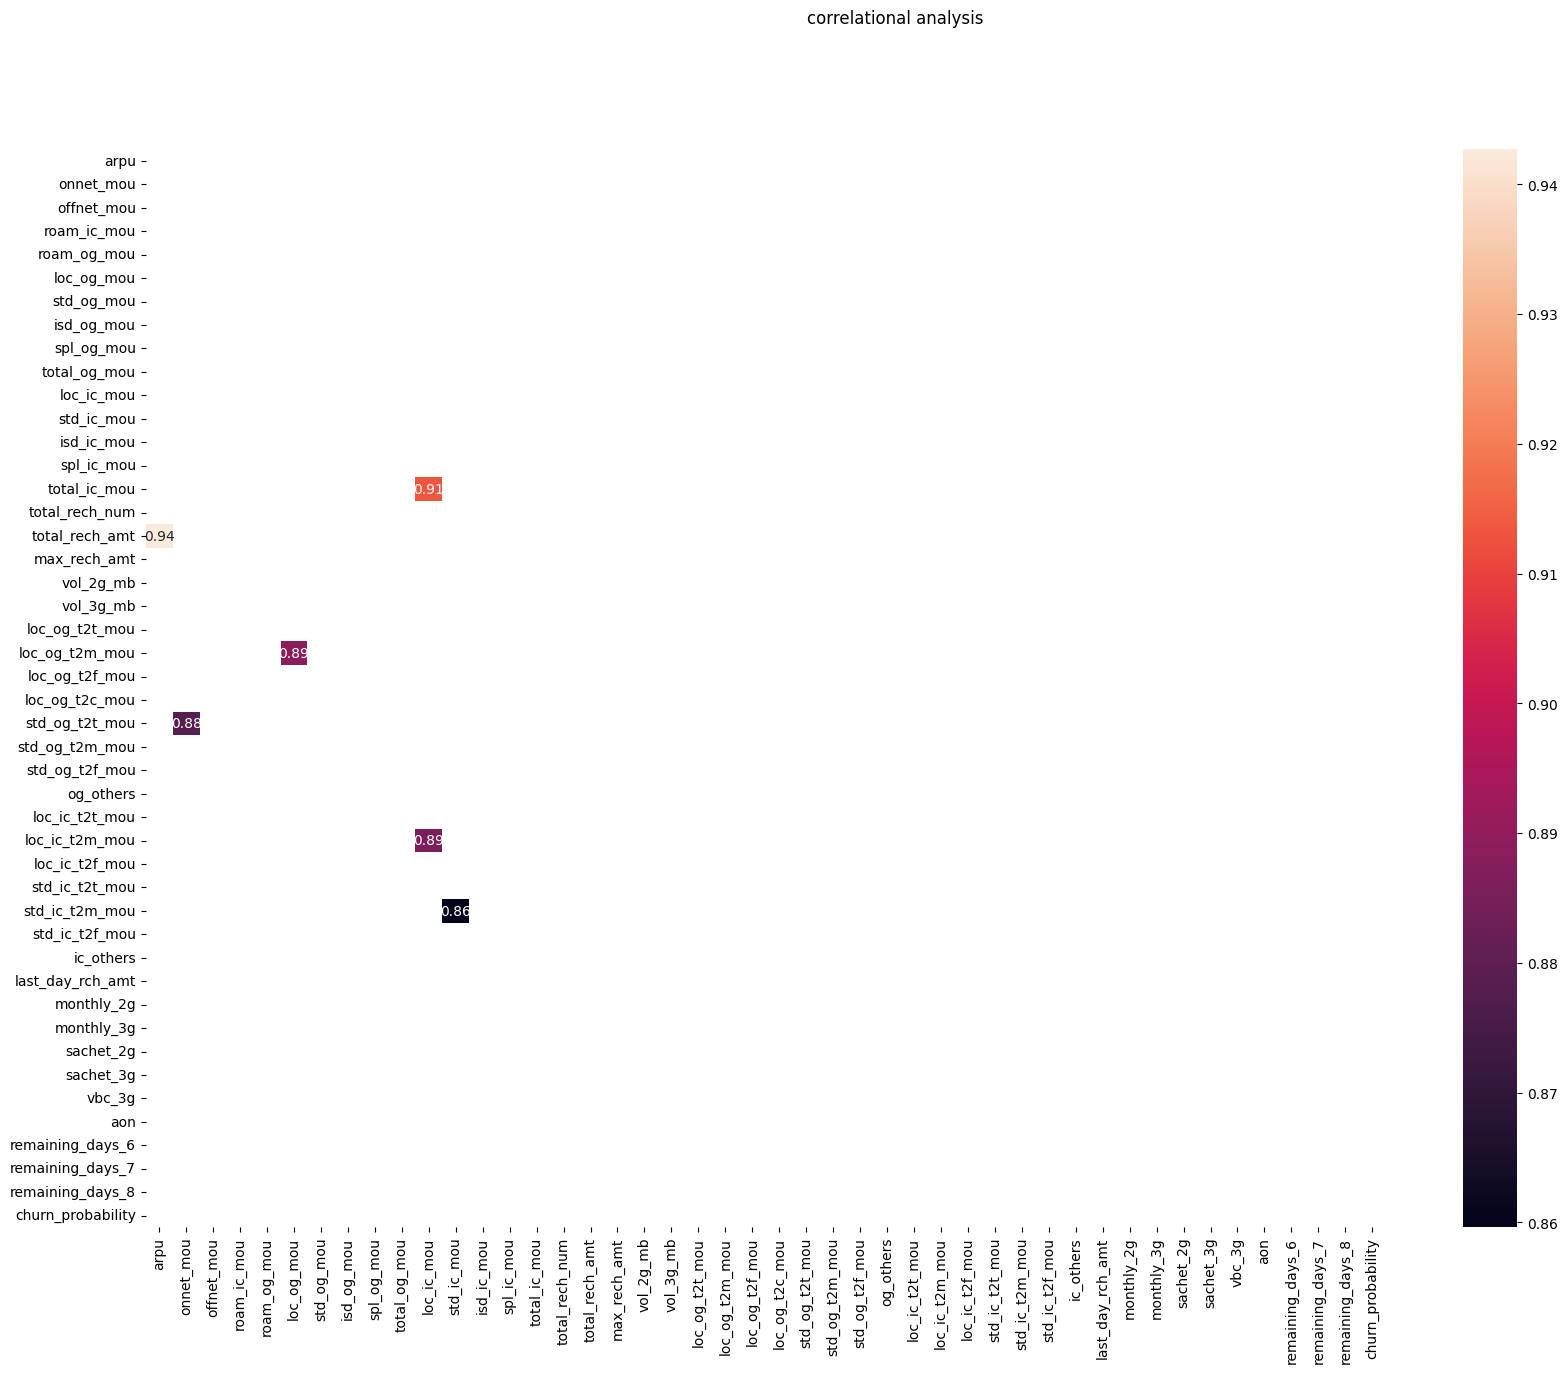

In [34]:
#correlation > 0.80 between independent features
plt.figure(figsize=(20,14))
sns.heatmap(churn_new.corr()[churn_new.corr()>0.85], annot=True, mask=np.triu(churn_new.corr()))
plt.suptitle('correlational analysis')
plt.show()

In [35]:
#highly correlated features
churn_new["std_ic_mou"].corr(churn_new['std_ic_t2m_mou'])

0.8596299989337445

In [36]:
#highly correlated features
churn_new["loc_ic_mou"].corr(churn_new['loc_ic_t2m_mou'])

0.8853084848944377

In [37]:
#highly correlated features
churn_new["std_og_t2t_mou"].corr(churn_new['onnet_mou'])

0.8783970182562615

In [38]:
#highly correlated features
churn_new["arpu"].corr(churn_new['total_rech_amt'])

0.9427044548275353

In [39]:
#highly correlated features
churn_new["total_ic_mou"].corr(churn_new['loc_ic_mou'])

0.9134705043400747

In [40]:
#highly correlated features
churn_new["loc_og_t2m_mou"].corr(churn_new['loc_og_mou'])

0.8891008280345734

In [41]:
#dropping highly correlated features
# columns with all same values
high_corr_col = ["std_ic_t2m_mou", 'loc_ic_t2m_mou', "std_og_t2t_mou", "arpu", "total_ic_mou", "loc_og_t2m_mou"]
churn_new = churn_new.drop(columns = high_corr_col, axis=1)
test_filtered = test_filtered.drop(columns = high_corr_col, axis=1)

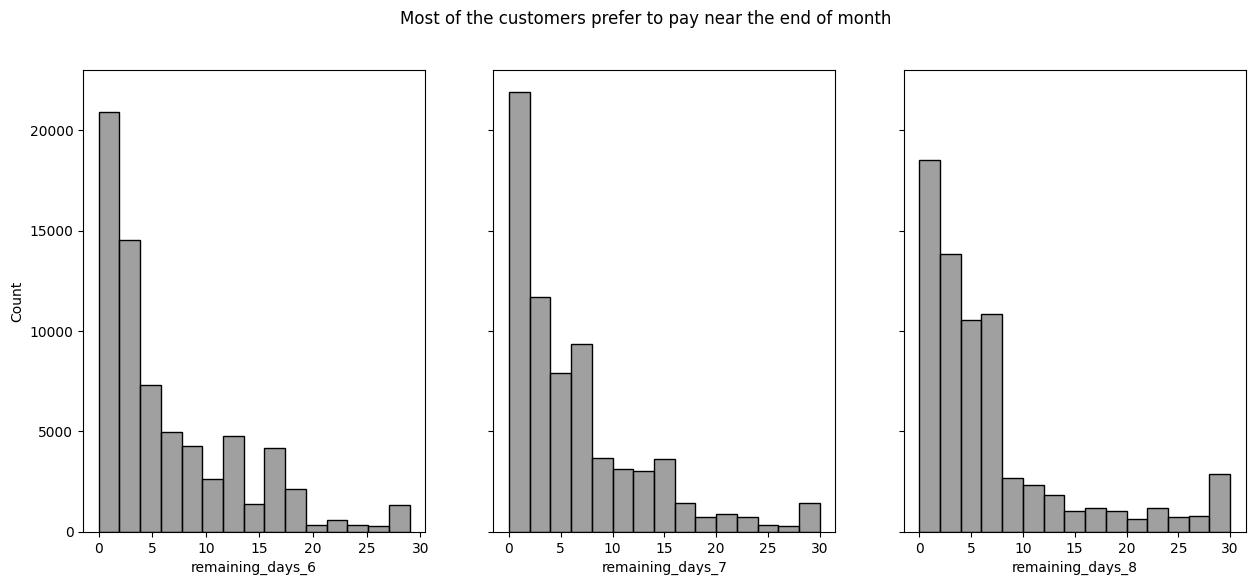

In [42]:
fig, ax = plt.subplots(1,3, figsize=(15, 6), sharey=True)
sns.histplot(data=churn_new, x='remaining_days_6', bins= 15, ax=ax[0], color='grey')
sns.histplot(data=churn_new, x='remaining_days_7', bins= 15, ax=ax[1], color='grey')
sns.histplot(data=churn_new, x='remaining_days_8', bins= 15, ax=ax[2], color='grey')
plt.suptitle("Most of the customers prefer to pay near the end of month")
plt.show()

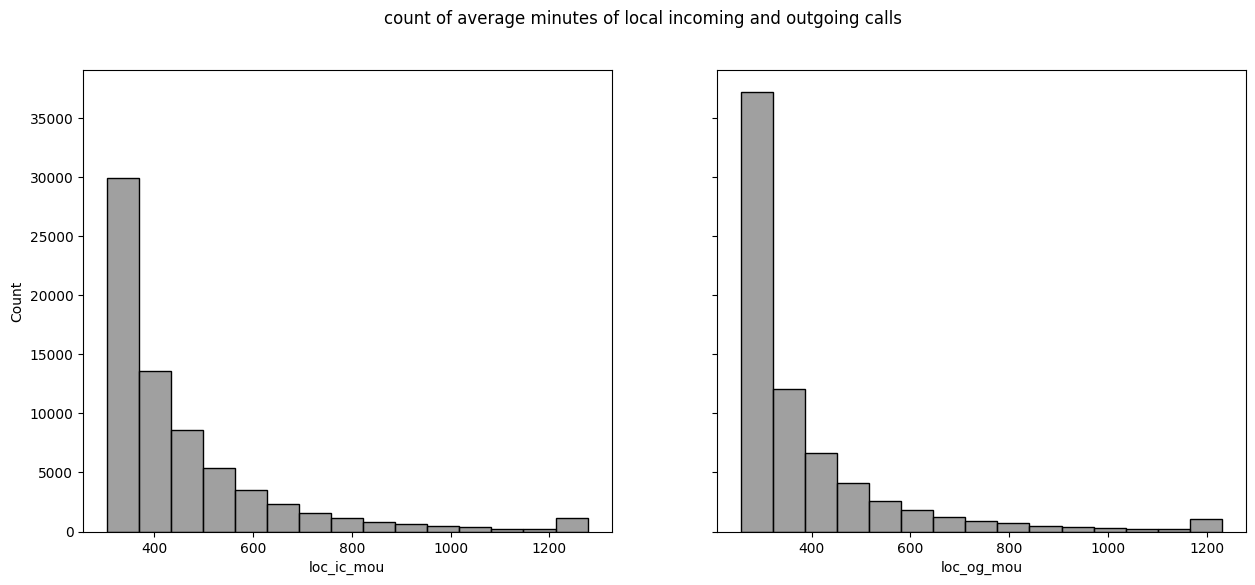

In [43]:
fig, ax = plt.subplots(1,2, figsize=(15, 6), sharey=True)
sns.histplot(data=churn_new, x='loc_ic_mou', bins= 15, ax=ax[0], color='grey')
sns.histplot(data=churn_new, x='loc_og_mou', bins= 15, ax=ax[1], color='grey')
plt.suptitle("count of average minutes of local incoming and outgoing calls ")
plt.show()

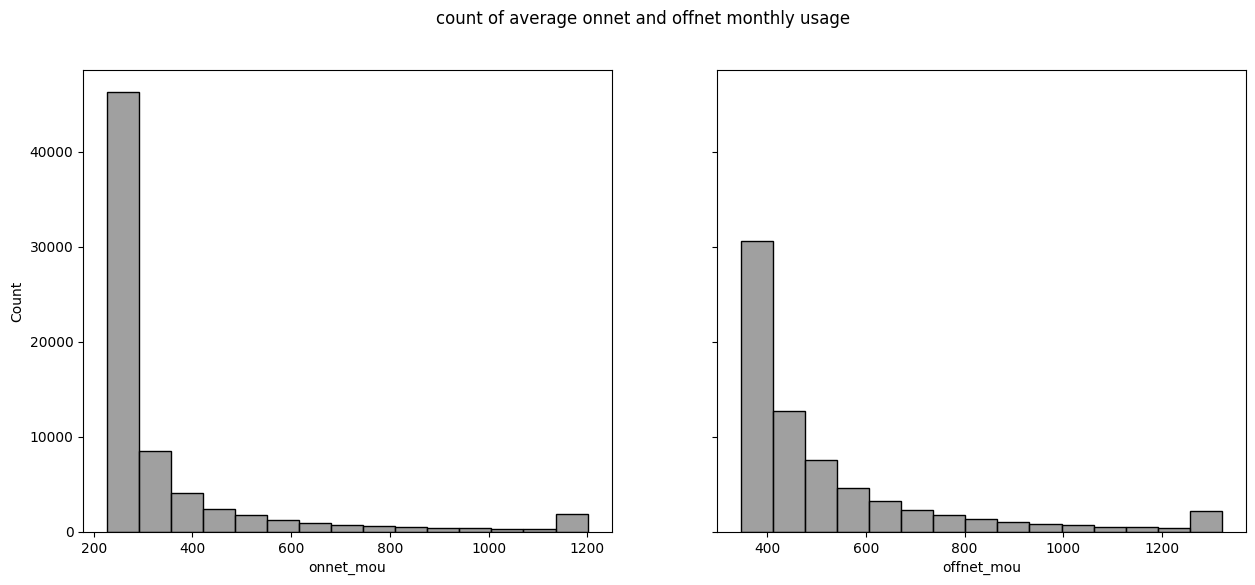

In [44]:
fig, ax = plt.subplots(1,2, figsize=(15, 6), sharey=True)
sns.histplot(data=churn_new, x='onnet_mou', bins= 15, ax=ax[0], color='grey')
sns.histplot(data=churn_new, x='offnet_mou', bins= 15, ax=ax[1], color='grey')
plt.suptitle("count of average onnet and offnet monthly usage ")
plt.show()

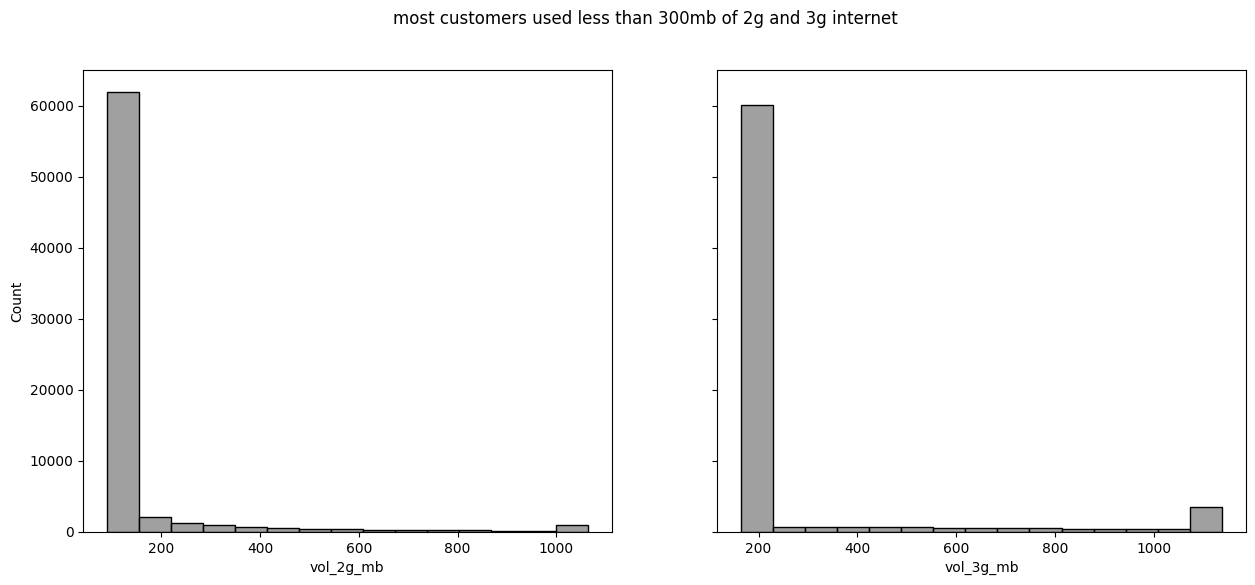

In [45]:
fig, ax = plt.subplots(1,2, figsize=(15, 6), sharey=True)
sns.histplot(data=churn_new, x='vol_2g_mb', bins= 15, ax=ax[0], color='grey')
sns.histplot(data=churn_new, x='vol_3g_mb', bins= 15, ax=ax[1], color='grey')
plt.suptitle("most customers used less than 300mb of 2g and 3g internet")
plt.show()

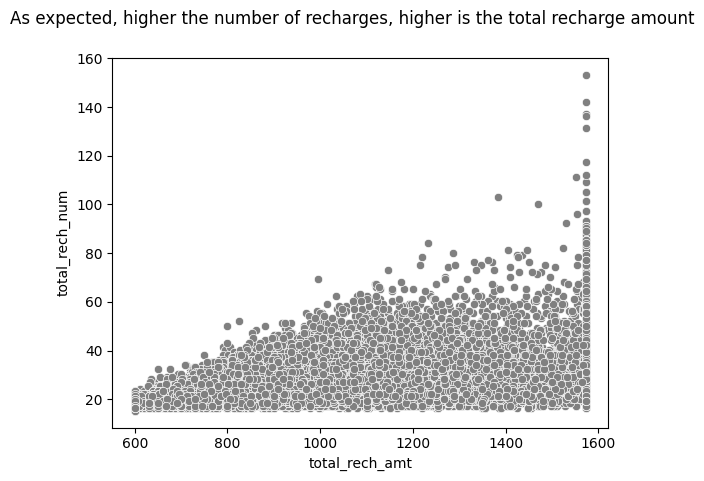

In [46]:
sns.scatterplot(data=churn_new, x='total_rech_amt', y='total_rech_num', color='grey')
plt.suptitle("As expected, higher the number of recharges, higher is the total recharge amount")
plt.show()

### Model Building

In [47]:
#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#modules for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score

#algorithms for sampling
#!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [48]:
churn_new['churn_probability'] = churn_new['churn_probability'].astype('int64')

In [49]:
churn_new.head()

,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_mou,std_og_mou,isd_og_mou,spl_og_mou,total_og_mou,loc_ic_mou,std_ic_mou,isd_ic_mou,spl_ic_mou,total_rech_num,total_rech_amt,max_rech_amt,vol_2g_mb,vol_3g_mb,loc_og_t2t_mou,loc_og_t2f_mou,loc_og_t2c_mou,std_og_t2m_mou,std_og_t2f_mou,og_others,loc_ic_t2t_mou,loc_ic_t2f_mou,std_ic_t2t_mou,std_ic_t2f_mou,ic_others,last_day_rch_amt,monthly_2g,monthly_3g,sachet_2g,sachet_3g,vbc_3g,aon,remaining_days_6,remaining_days_7,remaining_days_8,churn_probability
0,228.589621,350.217286,15.520597,22.417573,260.040079,277.681067,1.354624,8.542385,526.701589,329.026514,76.005296,14.200799,0.751572,17.27319,610.108561,216.97877,90.453397,164.868486,83.021706,7.227206,2.390305,152.077606,2.124285,0.467776,94.153771,23.543875,18.166059,4.166537,1.775082,121.855782,0.162688,0.153545,0.830269,0.156788,107.274322,972.874,8,21,7,0
1,227.299621,378.777286,15.520597,22.417573,257.430079,276.671067,1.354624,40.202385,554.731589,329.346514,60.825296,14.200799,0.101572,20.27319,650.108561,256.97877,90.453397,164.868486,82.741706,7.227206,32.180305,152.077606,2.124285,0.467776,96.893771,26.943875,17.956059,4.166537,1.775082,121.855782,0.162688,0.153545,0.830269,0.156788,107.274322,710.000,18,21,5,0
2,227.299621,347.887286,15.520597,22.417573,257.430079,276.671067,1.354624,8.542385,523.071589,334.326514,67.205296,14.200799,0.091572,17.27319,600.108561,206.97877,90.453397,164.868486,82.741706,7.227206,2.390305,152.077606,2.124285,0.467776,92.853771,23.543875,17.956059,4.166537,2.025082,121.855782,0.162688,0.153545,0.830269,0.156788,107.274322,882.000,19,9,7,0
3,227.299621,398.117286,15.520597,24.047573,281.060079,281.271067,1.354624,34.152385,576.911589,385.346514,63.635296,14.200799,0.091572,18.27319,730.108561,256.97877,90.453397,164.868486,82.741706,7.227206,10.420305,156.677606,2.124285,0.467776,110.243771,23.543875,17.956059,4.166537,1.775082,171.855782,0.162688,0.153545,0.830269,0.156788,107.274322,972.874,15,10,6,0
4,233.429621,357.517286,15.520597,22.417573,273.190079,276.671067,1.354624,8.542385,538.831589,332.626514,60.825296,14.200799,0.091572,23.27319,722.108561,236.97877,303.923397,164.868486,88.871706,12.237206,2.390305,152.077606,2.124285,0.467776,89.023771,29.683875,17.956059,4.166537,1.775082,151.855782,0.162688,0.153545,6.830269,0.156788,107.274322,647.000,5,5,1,0


In [50]:
# Extract input and output data
y = churn_new['churn_probability']
X = churn_new.iloc[:,:-1]

In [51]:
# Use dummy variables for categorical variables
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.53586001, -0.74503632, -0.1512569 , ...,  0.26207226,
         2.29718291,  0.07768139],
       [-0.54216068, -0.61835624, -0.1512569 , ...,  1.74744477,
         2.29718291, -0.18896009],
       [-0.54216068, -0.75537122, -0.1512569 , ...,  1.89598202,
         0.46842202,  0.07768139],
       ...,
       [-0.15904031,  0.41491148, -0.1512569 , ..., -0.18353949,
        -0.7507519 , -0.58892233],
       [-0.50938738, -0.69966037, -0.1512569 , ..., -0.7776885 ,
         0.92561224, -0.18896009],
       [-0.54216068, -0.75537122, -0.1512569 , ...,  0.70768401,
        -0.29356168, -0.05563935]])

In [52]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

In [53]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=23)             # running RFE with 19 variables as output
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]

In [54]:
X_train = X_train[col]
X_test = X_test[col]

In [55]:
# Logistic Regression Model

model_name = 'Logistic Regression'

lr = LogisticRegression(penalty = 'l2', solver='lbfgs', random_state=0, max_iter=10000).fit(X_train, y_train)
train_y_pred = lr.predict(X_train)
test_y_pred = lr.predict(X_test)

# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(y_train, train_y_pred)
val_acc = accuracy_score(y_test, test_y_pred)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test, test_y_pred)
f_score = f1_score(y_test, test_y_pred)
recall = recall_score(y_test, test_y_pred)

# creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_acc, val_acc, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall Score'])

evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression,0.914748,0.914929,0.392657,0.7,0.272856


In [56]:
# Decision Tree model 
model_name = 'Decision Tree'

dt = DecisionTreeClassifier(max_depth = 50, random_state = 0).fit(X_train, y_train)
train_y_pred = dt.predict(X_train)
test_y_pred = dt.predict(X_test)

# Evaluating the accuracy of the training and validation sets
train_acc = accuracy_score(train_y_pred, y_train)
val_acc = accuracy_score(test_y_pred, y_test)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test, test_y_pred)
f_score = f1_score(y_test, test_y_pred)
recall = recall_score(y_test, test_y_pred)

# adding calculations to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression,0.914748,0.914929,0.392657,0.70000,0.272856
1,Decision Tree,0.998411,0.906857,0.544693,0.53682,0.552799


In [57]:
#KNN model 

model_name = 'kNN'
knn = KNeighborsClassifier(n_neighbors = 13).fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets

train_y_pred = knn.predict(X_train)
test_y_pred = knn.predict(X_test)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred, y_train)
val_acc = accuracy_score(test_y_pred, y_test)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test, test_y_pred)
f_score = f1_score(y_test, test_y_pred)
recall = recall_score(y_test, test_y_pred)

# adding calculations to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression,0.914748,0.914929,0.392657,0.700000,0.272856
1,Decision Tree,0.998411,0.906857,0.544693,0.536820,0.552799
2,kNN,0.938445,0.933357,0.637951,0.704974,0.582566


In [58]:
#random forest
model_name = 'Random Forest'

rf = RandomForestClassifier(n_estimators = 200, max_depth = 5, class_weight = 'balanced', random_state = 123).fit(X_train, y_train)

# Evaluating the accuracy of the training and validation sets

train_y_pred = rf.predict(X_train)
test_y_pred = rf.predict(X_test)
# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred, y_train)
val_acc = accuracy_score(test_y_pred, y_test)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test, test_y_pred)
f_score = f1_score(y_test, test_y_pred)
recall = recall_score(y_test, test_y_pred)

# adding calculations to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression,0.914748,0.914929,0.392657,0.700000,0.272856
1,Decision Tree,0.998411,0.906857,0.544693,0.536820,0.552799
2,kNN,0.938445,0.933357,0.637951,0.704974,0.582566
3,Random Forest,0.911427,0.910714,0.639354,0.539173,0.785259


In [60]:
#Hypertuning Random Forest
rf = RandomForestClassifier(random_state = 0,  min_samples_leaf = 5)

param_grid = {'max_depth': np.arange(4, 14, 2), 'n_estimators' : np.arange(50, 300, 49)} # Parameter range

# grid search
grid = GridSearchCV(rf, param_grid, cv = 2, scoring = 'accuracy', verbose = 1)


# fitting the model
grid_search=grid.fit(X_train, y_train)


Fitting 2 folds for each of 7 candidates, totalling 14 fits


In [62]:
# optimal value of max_depth
print('The optimal value of max_depth is', grid_search.best_params_['max_depth'])

accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

The optimal value of max_depth is 12
Accuracy for our training dataset with tuning is : 94.17%


In [63]:
# Re-fit model with the combination of parameters obtained from GridSearchCV

model_name = 'Random Forest HT'

rf = RandomForestClassifier(max_depth = 12, random_state=0).fit(X_train, y_train)

train_y_pred = rf.predict(X_train)
test_y_pred = rf.predict(X_test)

# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred, y_train)
val_acc = accuracy_score(test_y_pred, y_test)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test, test_y_pred)
f_score = f1_score(y_test, test_y_pred)
recall = recall_score(y_test, test_y_pred)


# adding calculations to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression,0.914748,0.914929,0.392657,0.700000,0.272856
1,Decision Tree,0.998411,0.906857,0.544693,0.536820,0.552799
2,kNN,0.938445,0.933357,0.637951,0.704974,0.582566
3,Random Forest,0.911427,0.910714,0.639354,0.539173,0.785259
4,Random Forest HT,0.949821,0.941571,0.675654,0.766877,0.603827


In [80]:
# Find the importance of all the features according to the optimal model defined above
importance = rf.feature_importances_

In [81]:
for i,v in zip(churn_new.columns, importance):
  print(f' {i} : {v*100:.2f}')

 onnet_mou : 2.58
 offnet_mou : 3.21
 roam_ic_mou : 3.01
 roam_og_mou : 0.49
 loc_og_mou : 1.33
 std_og_mou : 16.66
 isd_og_mou : 28.71
 spl_og_mou : 4.76
 total_og_mou : 0.70
 loc_ic_mou : 3.43
 std_ic_mou : 3.61
 isd_ic_mou : 1.49
 spl_ic_mou : 0.20
 total_rech_num : 0.03
 total_rech_amt : 11.24
 max_rech_amt : 3.53
 vol_2g_mb : 0.47
 vol_3g_mb : 0.60
 loc_og_t2t_mou : 5.24
 loc_og_t2f_mou : 0.62
 loc_og_t2c_mou : 1.69
 std_og_t2m_mou : 2.27
 std_og_t2f_mou : 4.13


In [ ]:
import xgboost as xgb

# defining XGBoost
xg = xgb.XGBClassifier(random_state = 123)

# defining parameter range
param_grid = {'n_estimators': np.arange(760,800,10),
              'learning_rate': np.arange(0.01,0.03),
              'max_depth': np.arange(13,16)} # Parameter range

# running grid search to find the best combination of hyperparameters
grid = GridSearchCV(xg, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)
grid_search = grid.fit(X_train, y_train)

grid_search.best_params_
#40 minutes runtime

In [ ]:
# from xgboost.sklearn import XGBClassifier
# # refitting the model with best grid search parameters
# xg_best = XGBClassifier(n_estimators=780,
#                           learning_rate=0.02,
#                           max_depth= 15,
#                           class_weight = 'balanced',
#                           random_state = 123)

# xg_best.fit(X_train, y_train)

# train_y_pred = xg_best.predict(X_train)
# test_y_pred = xg_best.predict(X_test)

# # Evaluating the accuracy of the training and validation sets

# train_acc = accuracy_score(train_y_pred, y_train)
# val_acc = accuracy_score(test_y_pred, y_test)

# # Calculate the F1 score, Precision and Recall on the validation set

# precision = precision_score(y_test, test_y_pred)
# f_score = f1_score(y_test, test_y_pred)
# recall = recall_score(y_test, test_y_pred)


# # adding calculations to dataframe
# model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
# model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
# evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
# evaluate_df

In [87]:
model_name = "Light GBM"

import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

lightgbm = lgb.LGBMClassifier()
lightgbm.fit(X_train,y_train)

train_y_pred = lightgbm.predict(X_train)
test_y_pred = lightgbm.predict(X_test)

# Evaluating the accuracy of the training and validation sets

train_acc = accuracy_score(train_y_pred, y_train)
val_acc = accuracy_score(test_y_pred, y_test)

# Calculate the F1 score, Precision and Recall on the validation set

precision = precision_score(y_test, test_y_pred)
f_score = f1_score(y_test, test_y_pred)
recall = recall_score(y_test, test_y_pred)


# adding calculations to dataframe
model_eval_data = [model_name, train_acc, val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall Score
0,Logistic Regression,0.914748,0.914929,0.392657,0.700000,0.272856
1,Decision Tree,0.998411,0.906857,0.544693,0.536820,0.552799
2,kNN,0.938445,0.933357,0.637951,0.704974,0.582566
3,Random Forest,0.911427,0.910714,0.639354,0.539173,0.785259
4,Random Forest HT,0.949821,0.941571,0.675654,0.766877,0.603827
5,Light GBM,0.948285,0.942500,0.693567,0.749178,0.645641


In [88]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

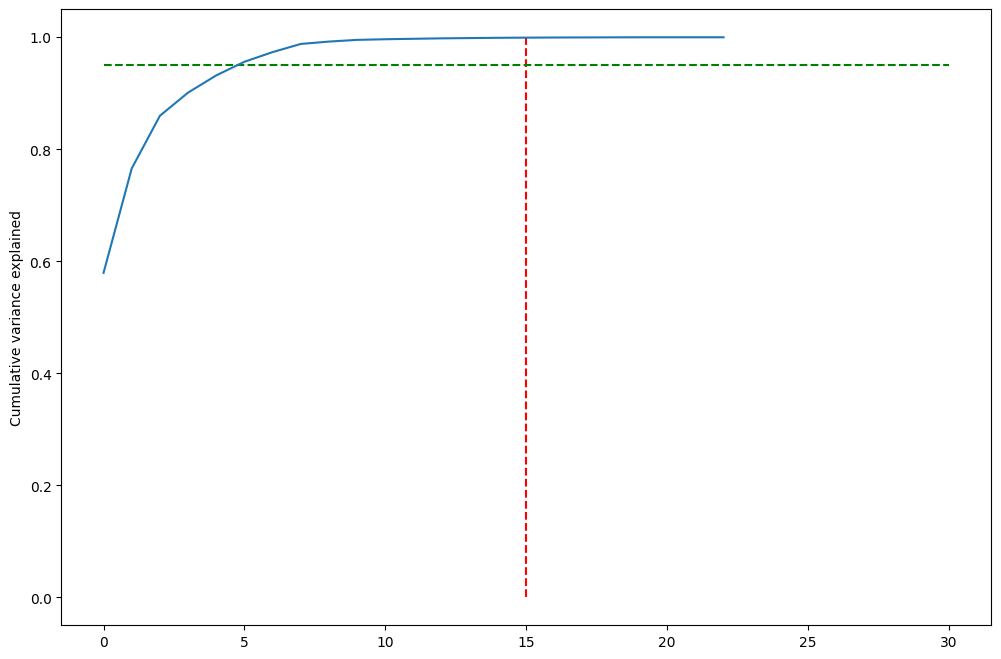

In [89]:
#PCA Analysis

pca = PCA(random_state=42)
pca.fit(X_train)
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [90]:
pca_final = IncrementalPCA(n_components=8)

df_train_pca = pca_final.fit_transform(X_train)
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)
pred_probs_test = model_pca.predict_proba(df_test_pca)

metrics.roc_auc_score(y_test, pred_probs_test[:,1])

0.8845939377964822

### Kaggle Submission

In [93]:
test_y_pred = lightgbm.predict(test_filtered[col])

In [94]:
y_classes = (test_y_pred > 0.5).astype(int)
y_classes

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
test = pd.read_csv("test.csv")
submit = pd.DataFrame(y_classes, columns=['churn_probability'])
submit.index = test['id']
submit

,churn_probability
id,
69999,0
70000,0
70001,0
70002,0
70003,0
...,...
99994,0
99995,0
99996,0


In [96]:
submit.to_csv("testing.csv", header=True, index=True)

In [98]:
submit['churn_probability'].value_counts()

0    29955
1       45
Name: churn_probability, dtype: int64